In [3]:
#tool box
import pandas as pd
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

#stylin'
plt.style.use('seaborn-darkgrid')

#import the data
data=pd.read_excel('/Users/oliviawren/Rivers Project/rivers_only.xlsx')


(0.0, 6000.0)

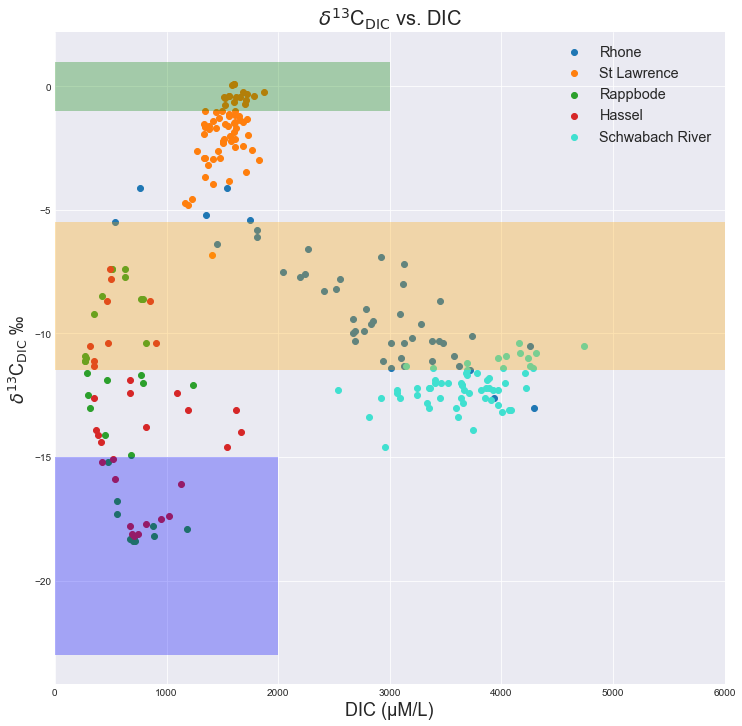

In [4]:
#adding end members
import matplotlib.patches as patches
fig, ax = plt.subplots(figsize=(12,12))
rect_Com = patches.Rectangle((0, -1), 3000, 2, edgecolor='none', facecolor='g',alpha=.3)
rect_Ccw = patches.Rectangle((0, -11.5), 9000, 6, edgecolor='none', facecolor='orange',alpha=.3)
rect_Cncw = patches.Rectangle((0, -23), 2000, 8, edgecolor='none', facecolor='b',alpha=.3)
ax.add_patch(rect_Com)
ax.add_patch(rect_Ccw)
ax.add_patch(rect_Cncw)
#Rhone
idx=(data['geo_name']=='Rhone') | (data['geo_name']=='Saone') | (data['geo_name']=='Doubs') | (data['geo_name']=='Aine') | (data['geo_name']=='Arve') | (data['geo_name']=='Isere') | (data['geo_name']=='Durance')  
plt.scatter(data['DIC_transformed'][idx],data['d13C_DIC'][idx],label='Rhone')
#St Lawrence
idx=((data['geo_name']=='St Lawrence') | (data['geo_name']=='St Lawrence River'))
plt.scatter(data['DIC_transformed'][idx],data['d13C_DIC'][idx],label='St Lawrence')
#Rappbode
idx=data['geo_name']=='Rappbode'
plt.scatter(data['DIC_transformed'][idx],data['d13C_DIC'][idx],label='Rappbode')
#Hassel
idx=data['geo_name']=='Hassel'
plt.scatter(data['DIC_transformed'][idx],data['d13C_DIC'][idx],label='Hassel')
#Schwabach River
idx=data['geo_name']=='Schwabach River'
plt.scatter(data['DIC_transformed'][idx],data['d13C_DIC'][idx],label='Schwabach River',color='turquoise')
# #indus
# idx=data['geo_name']=='Indus'
# plt.scatter(data['HCO3_trans'][idx],data['d13C_DIC'][idx],label='Indus River',color='purple')

# #Fraser
# idx=data['geo_name']=='Fraser'
# plt.scatter(data['HCO3_trans'][idx],data['d13C_DIC'][idx],label='Fraser River',color='hotpink')

plt.ylabel('$\delta^{13}$C$_{\mathrm{DIC}}$ ‰',fontsize=18)
plt.xlabel('DIC (µM/L)',fontsize=18)
plt.title('$\delta^{13}$C$_{\mathrm{DIC}}$ vs. DIC', fontsize=20)
plt.legend(loc='best',fontsize='x-large',frameon=False)
plt.xlim(0,6000)

In [5]:
idx=data['geo_name']=='Rhone'
print(np.min(data['DIC'][idx]))
print(np.max(data['Alk'][idx]))

0.54
3.44


In [6]:
#d13C histograms
#manually compute kde
#make min and max values larger- want ends of curves to hit 0 y
idx=(data['geo_name']=='Rhone') | (data['geo_name']=='Saone') | (data['geo_name']=='Doubs') | (data['geo_name']=='Aine') | (data['geo_name']=='Arve') | (data['geo_name']=='Isere') | (data['geo_name']=='Durance')  
fun=stats.gaussian_kde(data['d13C_DIC'][idx])

x=np.arange(-16,0,.01)

y=fun(x)

idx=((data['geo_name']=='St Lawrence') | (data['geo_name']=='St Lawrence River'))
fun=stats.gaussian_kde(data['d13C_DIC'][idx])

x2=np.arange(-15,3,.1)

y2=fun(x2)

idx=((data['geo_name']=='Hassel') | (data['geo_name']=='Rappbode'))
fun=stats.gaussian_kde(data['d13C_DIC'][idx])

x3=np.arange(-23,-1,.1)

y3=fun(x3)

idx=data['geo_name']=='Schwabach River'
fun=stats.gaussian_kde(data['d13C_DIC'][idx])

x4=np.arange(-16,-8,.1)

y4=fun(x4)

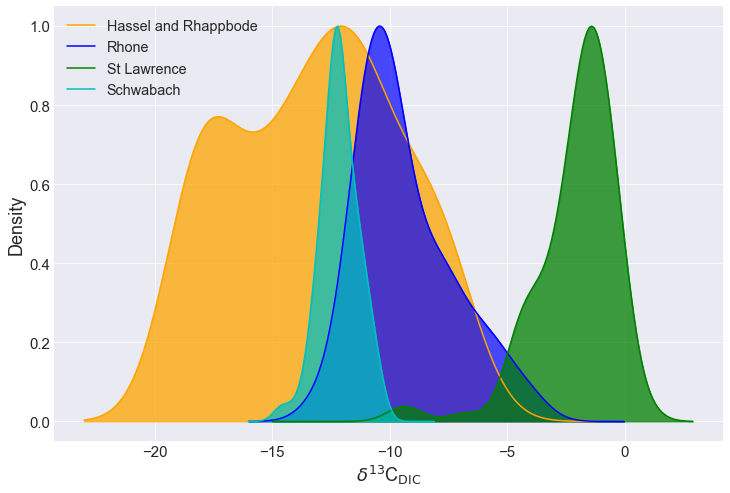

In [7]:
plt.figure(figsize=(12,8))

plt.plot(x3,y3/np.max(y3),color='orange',label='Hassel and Rhappbode')
plt.fill_between(x3,y3/np.max(y3),color='orange',alpha=.75)

plt.plot(x,y/np.max(y),color='b',label='Rhone')
plt.fill_between(x,y/np.max(y),color='b',alpha=.7)

plt.plot(x2,y2/np.max(y2),color='g',label='St Lawrence')
plt.fill_between(x2,y2/np.max(y2),color='g',alpha=.75)

plt.plot(x4,y4/np.max(y4),color='c',label='Schwabach')
plt.fill_between(x4,y4/np.max(y4),color='c',alpha=.75)


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Density',fontsize=18)
plt.xlabel('$\delta^{13}$C$_{\mathrm{DIC}}$',fontsize=18)

plt.legend(loc='upper left',fontsize='x-large',frameon=False)


In [8]:
#would it be interesting to calculate d13C predicted?
#Hypothesis: Hassell and Rhappbode will have the greatest d13C residuals because it has more DIC from silici weath
#Hassell and Rhappbode and Schwabach dont have Alk data
#Rhone and St Lawrence may be good enough...

In [9]:
# df = pd.DataFrame(data)
# data1=df.dropna(subset=['DIC_transformed','Alk_trans'])

# define input conditions; DIC and Alk
idx = data['doc_id']=='54bf5a07e13823023e43dd00'
kwargs = dict(
    par1 = data['DIC_transformed'][idx],
    par1_type = 2, 
    par2 = data['Alk_trans'][idx],
    par2_type = 1 
)

idx2=((data['geo_name']=='St Lawrence') | (data['geo_name']=='St Lawrence River'))
kwargs2 = dict(
    par1 = data['DIC_transformed'][idx2],
    par1_type = 2, 
    par2 = data['Alk_trans'][idx2],
    par2_type = 1 
)

In [10]:
# Import PyCO2SYS

import PyCO2SYS as pyco2

# Run PyCO2SYS
results = pyco2.sys(**kwargs)
results2 = pyco2.sys(**kwargs2)
# Extract and print out the result
pH_calc_rhone = np.array(results['pH'])
pH_calc_sl = np.array(results2['pH'])

In [11]:
T=25    #degree C
S=0    #PSS
TK = T + 273.15 
DIC=np.array(data['DIC_transformed'][idx])
DIC2=np.array(data['DIC_transformed'][idx2])

K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))


H=10**(-pH_calc_rhone)
H2=10**(-pH_calc_sl)  

HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))
CO2aq=-9
CO3=-2
HCO3=0
d13C_DIC_pred_rhone = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3

In [12]:
#calculate d13C_pred_rhone

T=25    #degree C
S=0    #FW
TK = T + 273.15 
DIC=np.array(data['DIC_transformed'][idx])
DIC2=np.array(data['DIC_transformed'][idx2])

K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))


H=10**(-pH_calc_rhone)
H2=10**(-pH_calc_sl)  

HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))
CO2aq=-9
CO3=-2
HCO3=0
d13C_DIC_pred_rhone = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3

HCO_3 = DIC2/(1 + H2/K1 + K2/H2)
CO_3 = DIC2/(1 + H2/K2 + H2*H2/(K1*K2))
CO2 = DIC2/(1 + K1/H2 + K1*K2/(H2*H2))
d13C_DIC_pred_sl = (CO2/DIC2)*CO2aq + (CO_3/DIC2)*CO3 + (HCO_3/DIC2)*HCO3
# print(d13C_DIC_pred_rhone)

In [13]:
#calculate residuals
#new idx to only include papers with Alk/DIC
r_rhone = data['d13C_DIC'][idx] - d13C_DIC_pred_rhone

r_sl = data['d13C_DIC'][idx2] - d13C_DIC_pred_sl

In [14]:
#make purple d13C_DIC equil line

T=25    #degree C
S=0    #FW
DIC=2100 #micromol/kg
K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))
    
pH = np.arange(4,11,.1)
H=10**(-pH)  

HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))
CO2aq=-9
CO3=-2
HCO3=0
d13C_DIC = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3

In [15]:
# #d13C residual histograms
# #manually compute kde
fun=stats.gaussian_kde(np.array(r_rhone))

x=np.arange(-12.65,-1.87,.01)

y=fun(x)

# fun=stats.gaussian_kde(np.array(r_sl))

# x2=np.arange(-11.5,0.83,.01)

# y2=fun(x)

In [16]:
#pretty unrevealing...
# #plot residual histogram
# plt.style.use('seaborn-darkgrid')
# plt.figure(figsize=(12,8))

# # plt.plot(x2,y2/np.max(y2),color='b',label='St Lawrence')
# # plt.fill_between(x2,y2/np.max(y2),color='c',alpha=.75)

# plt.plot(x,y/np.max(y),color='b',label='Rhone')
# plt.fill_between(x,y/np.max(y),color='b',alpha=.75)


# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.ylabel('Density',fontsize=18)
# plt.xlabel('$\delta^{13}$C$_{\mathrm{DIC (observed)}}$ - $\delta^{13}$C$_{\mathrm{DIC (predicted)}}$',fontsize=18)
# plt.title('residual histogram- rivers', fontsize=20)
# plt.grid(color='grey')
# plt.legend(loc='upper left',fontsize='x-large',frameon=False)

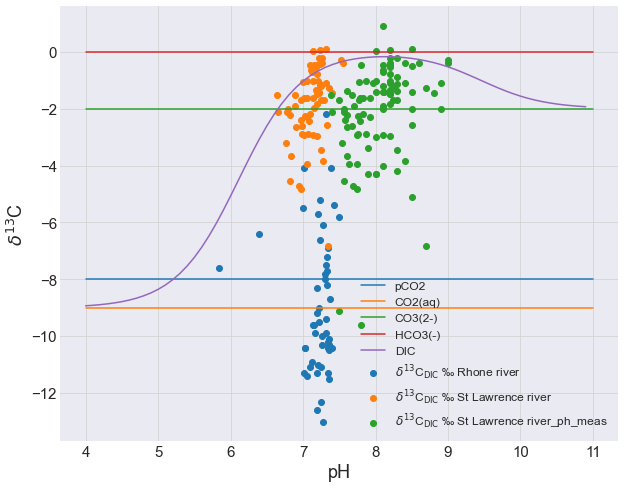

In [17]:
#plot data ph vs d13C
pCO2=(-8,-8)
CO2aq=(-9,-9)
CO3=(-2,-2)
HCO3=(0,0)
ph=(4,11)


plt.figure(figsize=(10,8))
plt.plot(ph,pCO2,label='pCO2')
plt.plot(ph,CO2aq, label='CO2(aq)')
plt.plot(ph,CO3, label='CO3(2-)')
plt.plot(ph,HCO3, label='HCO3(-)')
plt.plot(pH,d13C_DIC,label='DIC')
plt.scatter(pH_calc_rhone,data['d13C_DIC'][idx],label='$\delta^{13}$C$_{\mathrm{DIC}}$ ‰ Rhone river')
plt.scatter(pH_calc_sl,data['d13C_DIC'][idx2],label='$\delta^{13}$C$_{\mathrm{DIC}}$ ‰ St Lawrence river')
plt.scatter(data['pH'][idx2],data['d13C_DIC'][idx2],label='$\delta^{13}$C$_{\mathrm{DIC}}$ ‰ St Lawrence river_ph_meas')



plt.xlabel('pH',fontsize=18)
plt.ylabel('$\delta^{13}$C',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='lightgrey')
plt.legend(loc='best',fontsize='large',frameon=False)

#plot residual vs discharge rate...

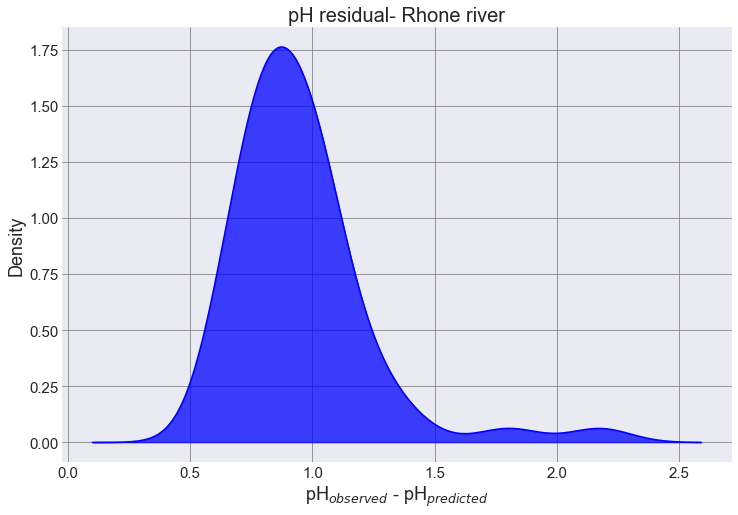

In [18]:
r_ph = data['pH'][idx] - pH_calc_rhone
# print(np.max(r_ph))
# print(np.min(r_ph))
fun=stats.gaussian_kde(np.array(r_ph))

x=np.arange(0.1,2.6,.01)

y=fun(x)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))

plt.plot(x,y,color='b',label='Rhone')
plt.fill_between(x,y,color='b',alpha=.75)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Density',fontsize=18)
plt.xlabel('pH$_{observed}$ - pH$_{predicted}$',fontsize=18)
plt.title('pH residual- Rhone river', fontsize=20)
plt.grid(color='grey')


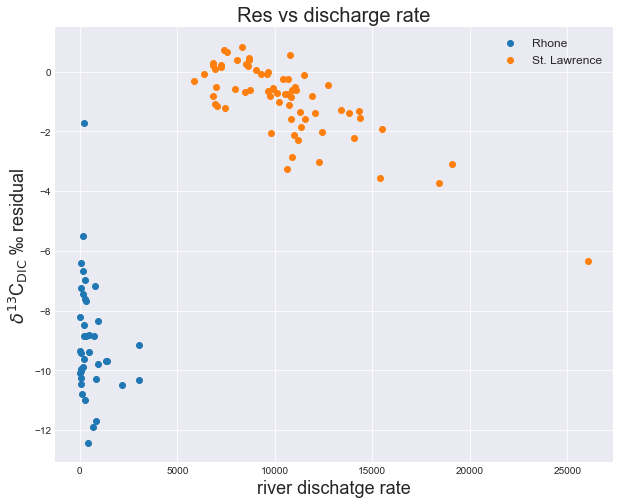

In [19]:
#res vs discharge rate
idx = data['doc_id']=='54bf5a07e13823023e43dd00'
r_rhone = data['d13C_DIC'][idx] - d13C_DIC_pred_rhone
idx2=((data['geo_name']=='St Lawrence') | (data['geo_name']=='St Lawrence River'))
plt.figure(figsize=(10,8))
plt.scatter(data['discharge rate'][idx],r_rhone,label='Rhone')
plt.scatter(data['discharge rate'][idx2],r_sl,label='St. Lawrence')

plt.ylabel('$\delta^{13}$C$_{\mathrm{DIC}}$ ‰ residual',fontsize=18)
plt.xlabel('river dischatge rate',fontsize=18)
plt.title('Res vs discharge rate', fontsize=20)
plt.legend(loc='best',fontsize='large',frameon=False)

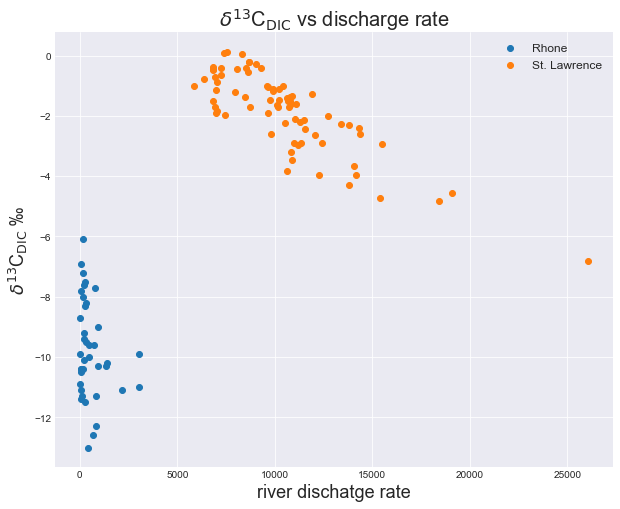

In [20]:
#data vs discharge rate
idx = data['doc_id']=='54bf5a07e13823023e43dd00'
idx2=((data['geo_name']=='St Lawrence') | (data['geo_name']=='St Lawrence River'))
plt.figure(figsize=(10,8))
plt.scatter(data['discharge rate'][idx],data['d13C_DIC'][idx],label='Rhone')
plt.scatter(data['discharge rate'][idx2],data['d13C_DIC'][idx2],label='St. Lawrence')

plt.ylabel('$\delta^{13}$C$_{\mathrm{DIC}}$ ‰ ',fontsize=18)
plt.xlabel('river dischatge rate',fontsize=18)
plt.title('$\delta^{13}$C$_{\mathrm{DIC}}$ vs discharge rate', fontsize=20)
plt.legend(loc='best',fontsize='large',frameon=False)

Text(0.5, 1.0, 'Rhone river')

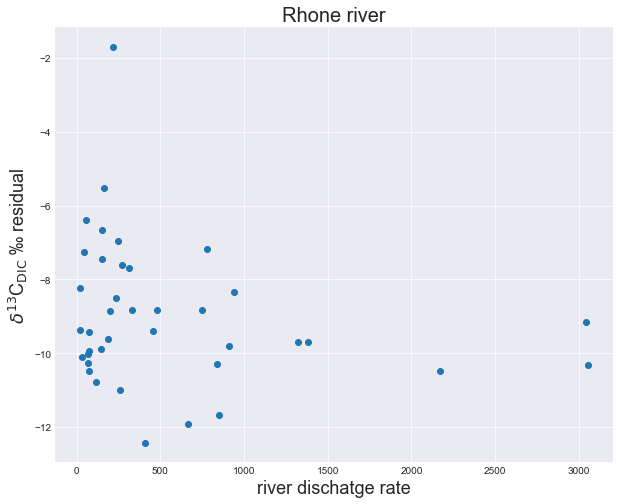

In [21]:
#res vs discharge rate: rhone
idx = data['doc_id']=='54bf5a07e13823023e43dd00'
r_rhone = data['d13C_DIC'][idx] - d13C_DIC_pred_rhone
idx2=((data['geo_name']=='St Lawrence') | (data['geo_name']=='St Lawrence River'))
plt.figure(figsize=(10,8))
plt.scatter(data['discharge rate'][idx],r_rhone,label='Rhone')
# plt.scatter(data['discharge rate'][idx2],r_sl,label='St. Lawrence')

plt.ylabel('$\delta^{13}$C$_{\mathrm{DIC}}$ ‰ residual',fontsize=18)
plt.xlabel('river dischatge rate',fontsize=18)
plt.title('Rhone river', fontsize=20)
# plt.legend(loc='best',fontsize='large',frameon=False)

Text(0, 0.5, '$\\delta^{13}$C$_{\\mathrm{DIC}}$ ‰ residual')

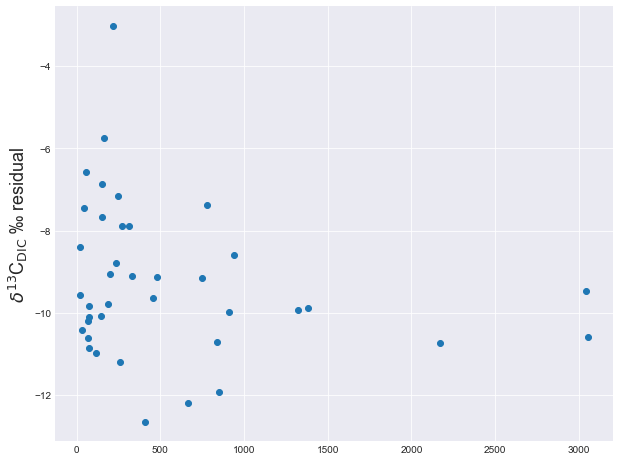

In [19]:
#St LAwrence
idx = data['doc_id']=='54bf5a07e13823023e43dd00'
r_rhone = data['d13C_DIC'][idx] - d13C_DIC_pred_rhone
idx2=((data['geo_name']=='St Lawrence') | (data['geo_name']=='St Lawrence River'))
plt.figure(figsize=(10,8))
plt.scatter(data['discharge rate'][idx],r_rhone,label='Rhone')
# plt.scatter(data['discharge rate'][idx2],r_sl,label='St. Lawrence')

plt.ylabel('$\delta^{13}$C$_{\mathrm{DIC}}$ ‰ residual',fontsize=18)
# plt.xlabel('river dischatge rate',fontsize=18)
# plt.title('St Lawrence river', fontsize=20)
# plt.legend(loc='best',fontsize='large',frameon=False)

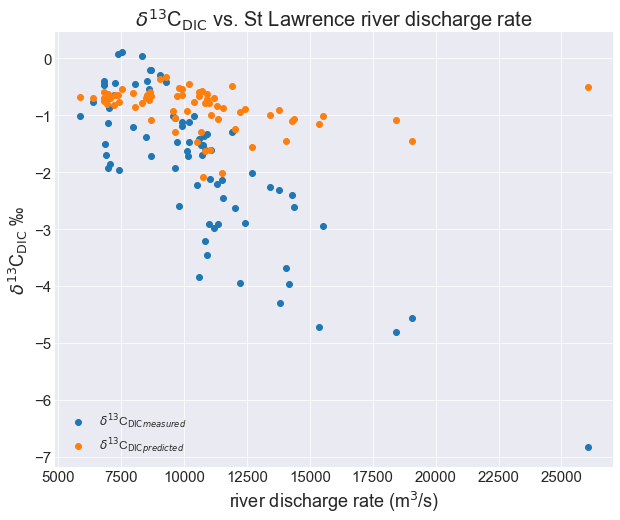

In [22]:
#SL data
idx=((data['geo_name']=='St Lawrence') | (data['geo_name']=='St Lawrence River'))
x=data['discharge rate'][idx]
y=data['d13C_DIC'][idx]
y2=d13C_DIC_pred_sl
plt.figure(figsize=(10,8))
plt.scatter(x,y,label='$\delta^{13}$C$_{\mathrm{DIC}}$$_{measured}$')
plt.scatter(x,y2,label='$\delta^{13}$C$_{\mathrm{DIC}}$$_{predicted}$')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('$\delta^{13}$C$_{\mathrm{DIC}}$ ‰',fontsize=18)
plt.xlabel('river discharge rate (m$^3$/s)',fontsize=18)
plt.title('$\delta^{13}$C$_{\mathrm{DIC}}$ vs. St Lawrence river discharge rate', fontsize=20)
plt.legend(loc='best',fontsize='large',frameon=False)

Text(0.5, 1.0, '$\\delta^{13}$C$_{\\mathrm{DIC}}$ vs. Rhone river discharge rate')

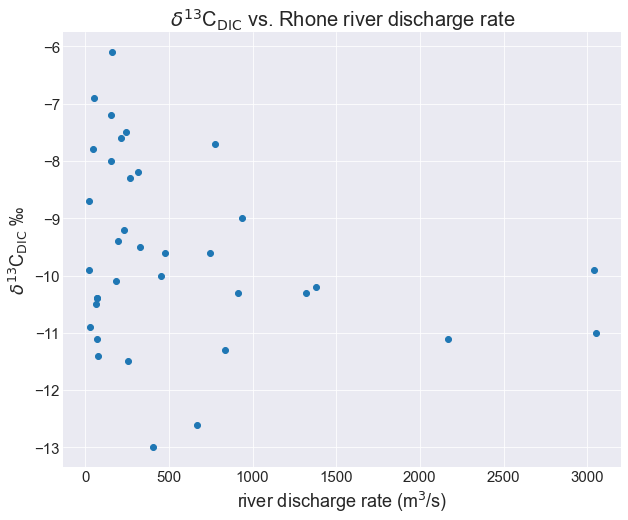

In [21]:
#rhone data
idx=(data['geo_name']=='Rhone') | (data['geo_name']=='Saone') | (data['geo_name']=='Doubs') | (data['geo_name']=='Aine') | (data['geo_name']=='Arve') | (data['geo_name']=='Isere') | (data['geo_name']=='Durance')  
x=data['discharge rate'][idx]
y=data['d13C_DIC'][idx]
y2=d13C_DIC_pred_rhone
plt.figure(figsize=(10,8))
plt.scatter(x,y)
# plt.scatter(x,y2,label='d13C_pred')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('$\delta^{13}$C$_{\mathrm{DIC}}$ ‰',fontsize=18)
plt.xlabel('river discharge rate (m$^3$/s)',fontsize=18)
plt.title('$\delta^{13}$C$_{\mathrm{DIC}}$ vs. Rhone river discharge rate', fontsize=20)


Text(0.5, 1.0, 'DIC vs. river discharge rate: Rhone river')

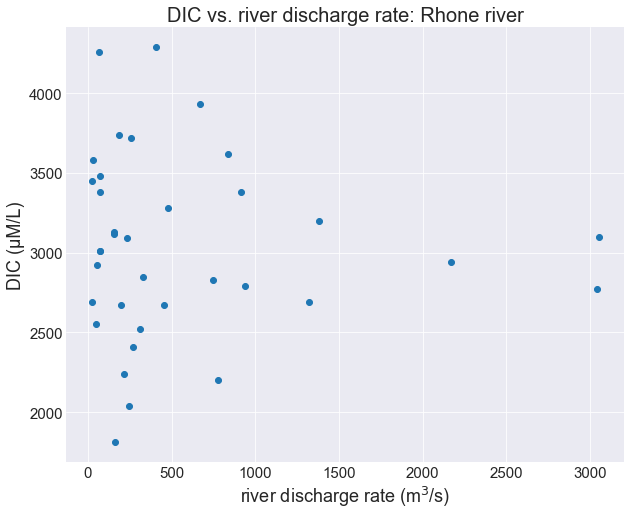

In [22]:
x=data['discharge rate'][idx]
y=data['DIC_transformed'][idx]
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('DIC (µM/L)',fontsize=18)
plt.xlabel('river discharge rate (m$^3$/s)',fontsize=18)
plt.title('DIC vs. river discharge rate: Rhone river', fontsize=20)


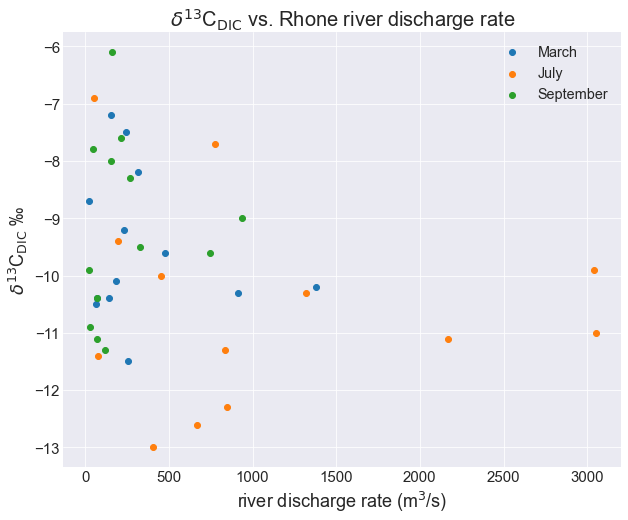

In [23]:
idx = data['month']=='March'
idx2 = data['month']=='July'
idx3 = data['month']=='September'


plt.figure(figsize=(10,8))
plt.scatter(data['discharge rate'][idx],data['d13C_DIC'][idx],label='March')
plt.scatter(data['discharge rate'][idx2],data['d13C_DIC'][idx2],label='July')
plt.scatter(data['discharge rate'][idx3],data['d13C_DIC'][idx3],label='September')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('$\delta^{13}$C$_{\mathrm{DIC}}$ ‰',fontsize=18)
plt.xlabel('river discharge rate (m$^3$/s)',fontsize=18)
plt.title('$\delta^{13}$C$_{\mathrm{DIC}}$ vs. Rhone river discharge rate', fontsize=20)
plt.legend(loc='best',fontsize='x-large',frameon=False)

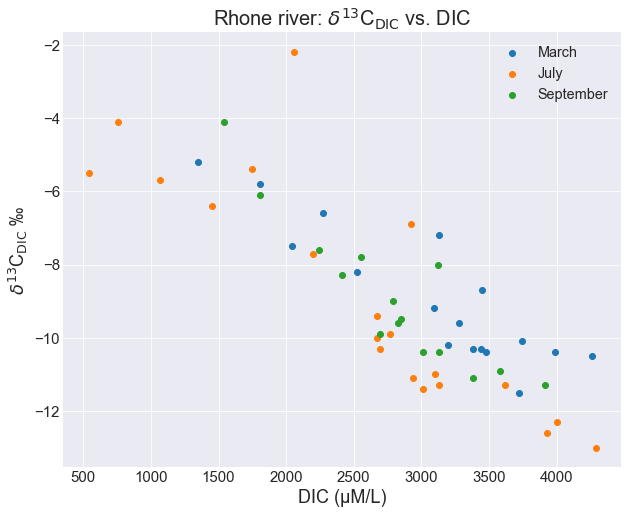

In [24]:
plt.figure(figsize=(10,8))
plt.scatter(data['DIC_transformed'][idx],data['d13C_DIC'][idx],label='March')
plt.scatter(data['DIC_transformed'][idx2],data['d13C_DIC'][idx2],label='July')
plt.scatter(data['DIC_transformed'][idx3],data['d13C_DIC'][idx3],label='September')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('$\delta^{13}$C$_{\mathrm{DIC}}$ ‰',fontsize=18)
plt.xlabel('DIC (µM/L)',fontsize=18)
plt.title('Rhone river: $\delta^{13}$C$_{\mathrm{DIC}}$ vs. DIC', fontsize=20)
plt.legend(loc='best',fontsize='x-large',frameon=False)

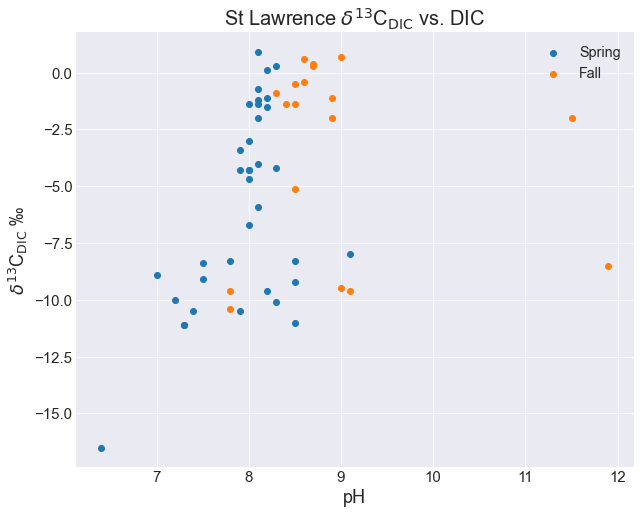

In [25]:
idx = data['month']=='Spring'
idx2 = data['month']=='Fall'

plt.figure(figsize=(10,8))
plt.scatter(data['pH'][idx],data['d13C_DIC'][idx],label='Spring')
plt.scatter(data['pH'][idx2],data['d13C_DIC'][idx2],label='Fall')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('$\delta^{13}$C$_{\mathrm{DIC}}$ ‰',fontsize=18)
plt.xlabel('pH',fontsize=18)
plt.title('St Lawrence $\delta^{13}$C$_{\mathrm{DIC}}$ vs. DIC', fontsize=20)
plt.legend(loc='best',fontsize='x-large',frameon=False)

In [27]:
data = pd.read_excel('Ca_data.xlsx')
idx = data['geo_name']=='Indus'

(0.0, 6000.0)

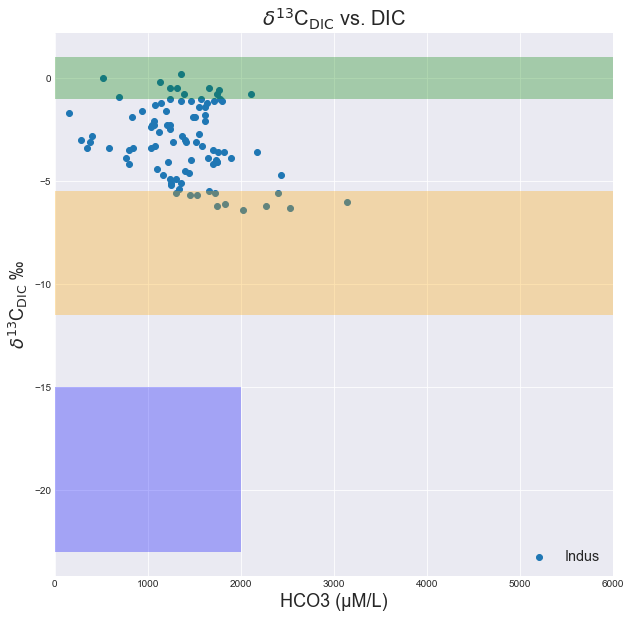

In [28]:
#Indus river

fig, ax = plt.subplots(figsize=(10,10))
rect_Com = patches.Rectangle((0, -1), 9000, 2, edgecolor='none', facecolor='g',alpha=.3)
rect_Ccw = patches.Rectangle((0, -11.5), 9000, 6, edgecolor='none', facecolor='orange',alpha=.3)
rect_Cncw = patches.Rectangle((0, -23), 2000, 8, edgecolor='none', facecolor='b',alpha=.3)
ax.add_patch(rect_Com)
ax.add_patch(rect_Ccw)
ax.add_patch(rect_Cncw)

plt.scatter(data['HCO3_trans'][idx],data['d13C_DIC'][idx],label='Indus')

plt.ylabel('$\delta^{13}$C$_{\mathrm{DIC}}$ ‰',fontsize=18)
plt.xlabel('HCO3 (µM/L)',fontsize=18)
plt.title('$\delta^{13}$C$_{\mathrm{DIC}}$ vs. DIC', fontsize=20)
plt.legend(loc='best',fontsize='x-large',frameon=False)
plt.xlim(0,6000)


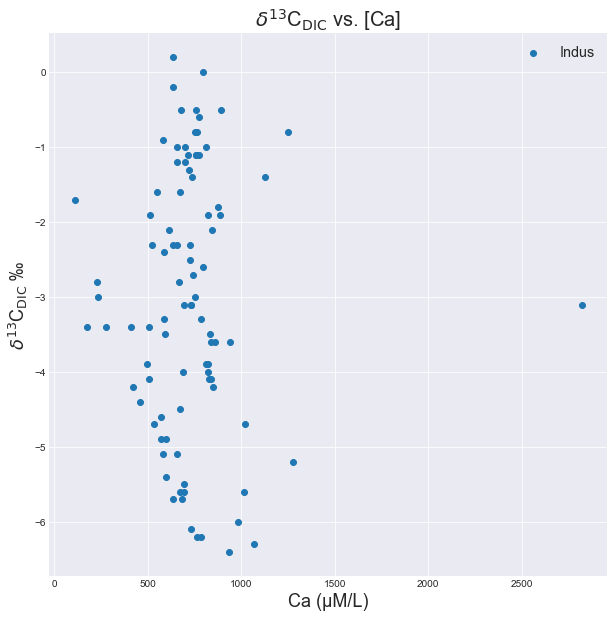

In [29]:
#more Indus
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(data['Ca_trans'][idx],data['d13C_DIC'][idx],label='Indus')

plt.ylabel('$\delta^{13}$C$_{\mathrm{DIC}}$ ‰',fontsize=18)
plt.xlabel('Ca (µM/L)',fontsize=18)
plt.title('$\delta^{13}$C$_{\mathrm{DIC}}$ vs. [Ca]', fontsize=20)
plt.legend(loc='best',fontsize='x-large',frameon=False)
